Implementation of 2D projection space and analysis.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import get_cmap
from sklearn.preprocessing import StandardScaler
from collections import defaultdict

Defining several analysis/plotting function used extensively later. Commented using ChatGPT.

In [16]:
def collect_centroids_intro_to_conclusion_no_scaling_highlighted(
    X_full, y_full, chunk_size=50, label_names=None, intro_label=0, conclusion_label=4, highlight_label=0
):
    """
    Compute and collect 2D projections of class centroids per chunk without feature scaling.
    Highlights a specific label in red, others in grey.

    Parameters:
        X_full: Feature matrix.
        y_full: Label vector.
        chunk_size: Number of samples per chunk.
        label_names: Optional mapping of labels to names.
        intro_label: Label for the "intro" section.
        conclusion_label: Label for the "conclusion" section.
        highlight_label: Label to highlight in red.

    Returns:
        List of tuples (proj_vec, proj_sig, label, color) for each centroid.
    """
    X_norm_full = X_full  # No scaling applied

    # Define projection directions
    intro_mean = X_norm_full[y_full == intro_label].mean(axis=0)
    conclusion_mean = X_norm_full[y_full == conclusion_label].mean(axis=0)
    vec_diff = conclusion_mean - intro_mean
    vec_diff /= np.linalg.norm(vec_diff)

    signature = X_norm_full.mean(axis=0)
    signature /= np.linalg.norm(signature)

    points = []
    num_chunks = len(X_full) // chunk_size

    for i in range(num_chunks):
        start = i * chunk_size
        end = (i + 1) * chunk_size
        if end > len(X_full):
            continue

        X_chunk = X_full[start:end]
        y_chunk = y_full[start:end]
        X_chunk_norm = X_chunk  # No normalization

        for label in np.unique(y_chunk):
            mask = y_chunk == label
            if np.sum(mask) == 0:
                continue

            class_centroid = X_chunk_norm[mask].mean(axis=0)
            proj_vec = class_centroid @ vec_diff
            proj_sig = class_centroid @ signature

            color = 'red' if label == highlight_label else 'grey'
            points.append((proj_vec, proj_sig, label, color))

    return points


def collect_centroids_intro_to_conclusion_no_scaling(X_full, y_full, chunk_size=50, label_names=None, intro_label=0, conclusion_label=4):
    """
    Same as above, but without highlighting. No scaling applied.

    Returns:
        List of tuples (proj_vec, proj_sig, label)
    """
    X_norm_full = X_full  # No scaling

    intro_mean = X_norm_full[y_full == intro_label].mean(axis=0)
    conclusion_mean = X_norm_full[y_full == conclusion_label].mean(axis=0)
    vec_diff = conclusion_mean - intro_mean
    vec_diff /= np.linalg.norm(vec_diff)

    signature = X_norm_full.mean(axis=0)
    signature /= np.linalg.norm(signature)

    points = []
    num_chunks = len(X_full) // chunk_size

    for i in range(num_chunks):
        start = i * chunk_size
        end = (i + 1) * chunk_size
        if end > len(X_full):
            continue

        X_chunk = X_full[start:end]
        y_chunk = y_full[start:end]
        X_chunk_norm = X_chunk

        for label in np.unique(y_chunk):
            mask = y_chunk == label
            if np.sum(mask) == 0:
                continue

            class_centroid = X_chunk_norm[mask].mean(axis=0)
            proj_vec = class_centroid @ vec_diff
            proj_sig = class_centroid @ signature

            points.append((proj_vec, proj_sig, label))

    return points


def collect_centroids_intro_to_conclusion(X_full, y_full, chunk_size=50, label_names=None, intro_label=0, conclusion_label=4):
    """
    Collect class centroids from chunks, with scaling and intro→conclusion projection.

    Returns:
        List of tuples (proj_vec, proj_sig, label)
    """
    scaler = StandardScaler()
    X_norm_full = scaler.fit_transform(X_full)

    intro_mean = X_norm_full[y_full == intro_label].mean(axis=0)
    conclusion_mean = X_norm_full[y_full == conclusion_label].mean(axis=0)
    vec_diff = conclusion_mean - intro_mean
    vec_diff /= np.linalg.norm(vec_diff)

    signature = X_norm_full.mean(axis=0)
    signature /= np.linalg.norm(signature)

    points = []
    num_chunks = len(X_full) // chunk_size

    for i in range(num_chunks):
        start = i * chunk_size
        end = (i + 1) * chunk_size
        if end > len(X_full):
            continue

        X_chunk = X_full[start:end]
        y_chunk = y_full[start:end]
        X_chunk_norm = scaler.transform(X_chunk)

        for label in np.unique(y_chunk):
            mask = y_chunk == label
            if np.sum(mask) == 0:
                continue

            class_centroid = X_chunk_norm[mask].mean(axis=0)
            proj_vec = class_centroid @ vec_diff
            proj_sig = class_centroid @ signature

            points.append((proj_vec, proj_sig, label))

    return points


def collect_centroids(X_full, y_full, vec_diff, chunk_size=50, label_names=None):
    """
    Collect centroids using a provided projection vector.
    Data is scaled using StandardScaler.

    Returns:
        List of tuples (proj_vec, proj_sig, label)
    """
    scaler = StandardScaler()
    X_norm_full = scaler.fit_transform(X_full)

    vec_diff /= np.linalg.norm(vec_diff)

    signature = X_norm_full.mean(axis=0)
    signature /= np.linalg.norm(signature)

    points = []
    num_chunks = len(X_full) // chunk_size

    for i in range(num_chunks):
        start = i * chunk_size
        end = (i + 1) * chunk_size
        if end > len(X_full):
            continue

        X_chunk = X_full[start:end]
        y_chunk = y_full[start:end]
        X_chunk_norm = scaler.transform(X_chunk)

        for label in np.unique(y_chunk):
            mask = y_chunk == label
            if np.sum(mask) == 0:
                continue

            class_centroid = X_chunk_norm[mask].mean(axis=0)
            proj_vec = class_centroid @ vec_diff
            proj_sig = class_centroid @ signature

            points.append((proj_vec, proj_sig, label))

    return points


def collect_centroids_intro_to_conclusion_highlighted(
    X_full, y_full, chunk_size=50, label_names=None,
    intro_label=0, conclusion_label=4, highlight_label=0
):
    """
    Same as collect_centroids_intro_to_conclusion but with one label highlighted in red.

    Returns:
        List of tuples (proj_vec, proj_sig, label, color)
    """
    scaler = StandardScaler()
    X_norm_full = scaler.fit_transform(X_full)

    intro_mean = X_norm_full[y_full == intro_label].mean(axis=0)
    conclusion_mean = X_norm_full[y_full == conclusion_label].mean(axis=0)
    vec_diff = conclusion_mean - intro_mean
    vec_diff /= np.linalg.norm(vec_diff)

    signature = X_norm_full.mean(axis=0)
    signature /= np.linalg.norm(signature)

    points = []
    num_chunks = len(X_full) // chunk_size

    for i in range(num_chunks):
        start = i * chunk_size
        end = (i + 1) * chunk_size
        if end > len(X_full):
            continue

        X_chunk = X_full[start:end]
        y_chunk = y_full[start:end]
        X_chunk_norm = scaler.transform(X_chunk)

        for label in np.unique(y_chunk):
            mask = y_chunk == label
            if np.sum(mask) == 0:
                continue

            class_centroid = X_chunk_norm[mask].mean(axis=0)
            proj_vec = class_centroid @ vec_diff
            proj_sig = class_centroid @ signature
            color = 'red' if label == highlight_label else 'grey'

            points.append((proj_vec, proj_sig, label, color))

    return points


def plot_collected_centroids(points, label_names=None):
    """
    Plot 2D projected centroids with class-color mapping and legend.

    Parameters:
        points: List of (x, y, label)
        label_names: Optional label name dictionary
    """
    plt.figure(figsize=(8, 6))
    labels = sorted(set(p[2] for p in points))

    cmap = get_cmap('tab10')
    colors = cmap(np.linspace(0, 1, len(labels)))
    color_map = {label: colors[i] for i, label in enumerate(labels)}

    for x, y, label in points:
        plt.scatter(x, y, s=80, color=color_map[label], alpha=0.8, edgecolor='k')

    handles = [
        plt.Line2D([0], [0], marker='o', color='w',
                   label=label_names[label] if label_names else str(label),
                   markerfacecolor=color_map[label], markeredgecolor='k', markersize=8)
        for label in labels
    ]

    plt.legend(handles=handles, title="Class", loc='center left', bbox_to_anchor=(1, 0.5),
               ncol=2, fontsize='small', frameon=False)
    plt.xlabel("Projection on vec_diff (Intro → Conclusion)")
    plt.ylabel("Projection on signature (Global Mean Similarity)")
    plt.title("CPS Projection of Section Centroids Across Chunks")
    plt.grid(True)
    plt.tight_layout([0, 0, 0.75, 1])
    plt.show()


def plot_collected_centroids_highlighted(points, label_names=None):
    """
    Plot centroids with fixed colors (red for highlight, grey for others).

    Parameters:
        points: List of (x, y, label, color)
        label_names: Optional label name dictionary
    """
    plt.figure(figsize=(8, 6))
    seen_labels = set()

    for x, y, label, color in points:
        label_str = label_names[label] if label_names else str(label)
        show_label = label_str if label not in seen_labels else None
        seen_labels.add(label)
        plt.scatter(x, y, s=80, color=color, alpha=0.8, edgecolor='k', label=show_label)

    if label_names:
        plt.legend(title="Class")

    plt.xlabel("Projection on vec_diff (Intro → Conclusion)")
    plt.ylabel("Projection on signature (Global Mean Similarity)")
    plt.title("CPS Projection of Section Centroids Across Chunks")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



Projecting all sections on vector difference "Introduction" --> "Conclusion". 

In [17]:
import ast

# Read data
chatgpt_data = pd.read_csv("embeddingsChatGPT.csv")

# Convert string embeddings to lists of floats
embeddings = chatgpt_data['embedding'].apply(ast.literal_eval).to_list()

# Convert list of lists to numpy array
X = np.array(embeddings)

# Apply mask on X and y to filter out undesired labels
mask = chatgpt_data['section_label'].isin([0, 1, 2, 3, 4, 5])
X = X[mask]
y = chatgpt_data.loc[mask, 'section_label'].to_numpy()

C:\Users\larsg\AppData\Local\Temp\ipykernel_9244\1169831386.py:251: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')


TypeError: tight_layout() takes 0 positional arguments but 1 was given

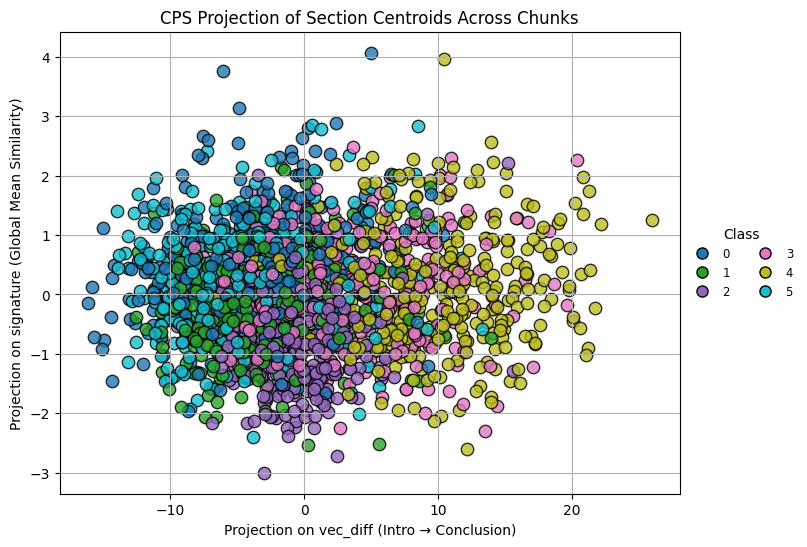

In [19]:
# Compute & plot all samples
points = collect_centroids_intro_to_conclusion(
    X, y,
    chunk_size=1,
    intro_label=0,
    conclusion_label=4
)
plot_collected_centroids(points)

C:\Users\larsg\AppData\Local\Temp\ipykernel_9244\2160362472.py:251: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')


TypeError: tight_layout() takes 0 positional arguments but 1 was given

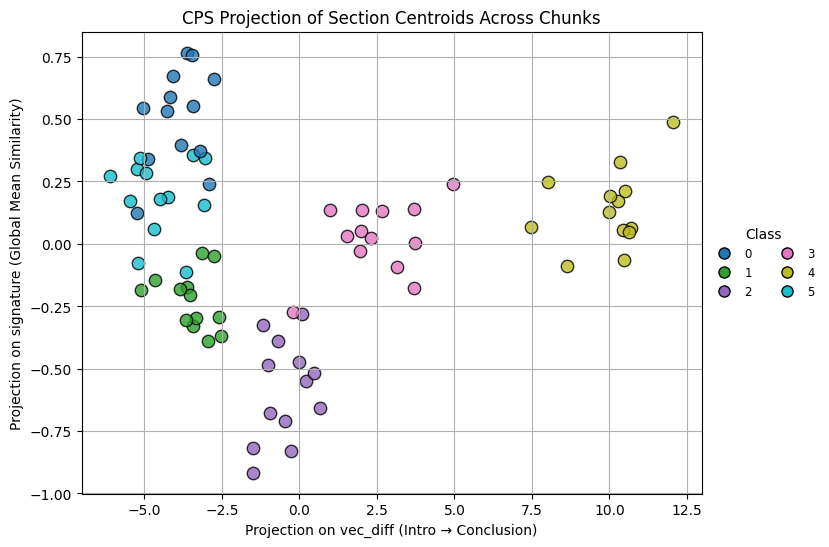

In [ ]:
#Compute and plot centroids with chunk size 150
points = collect_centroids_intro_to_conclusion(
    X, y,
    chunk_size=150,
    intro_label=0,
    conclusion_label=4
)
plot_collected_centroids(points)

Highlighting certain labels

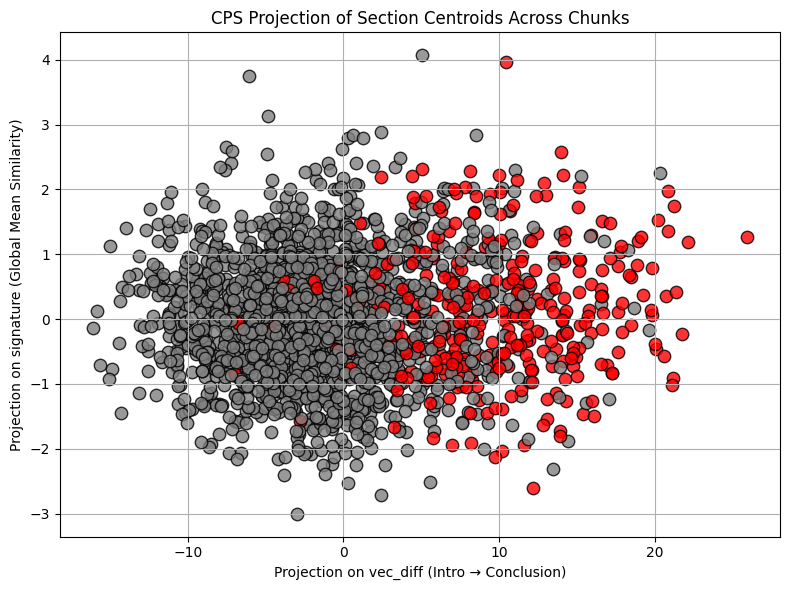

In [ ]:
# Compute & plot centroids
points = collect_centroids_intro_to_conclusion_highlighted(
    X[:], y[:],
    chunk_size=1,
    label_names=label_names,
    intro_label=0,
    conclusion_label=4,
    highlight_label=4
)
plot_collected_centroids_highlighted(points)

Define new plotting function with more distinct point shapes to allow for labeling of more seperate classes.

In [ ]:
from matplotlib.colors import hsv_to_rgb

# Generate N unique colors using HSV
def generate_distinct_colors(n):
    hues = np.linspace(0, 1, n, endpoint=False)
    colors = [hsv_to_rgb((h, 0.65, 0.9)) for h in hues]
    return colors

# Define a set of unique markers (extendable)
MARKERS = ['o', 's', '^', 'v', 'D', 'P', '*', 'X', '<', '>', 'H', '8']

def plot_collected_centroids(points, label_names):
    """
    Plot collected class centroids in CPS projection space using color-coded labels and unique markers.
    
    Args:
        points: List of tuples (x, y, numeric_label)
        label_names: List or dict mapping numeric_label → class name
    """
    plt.figure(figsize=(14, 8))

    # Extract unique numeric labels
    labels = sorted(set(p[2] for p in points))

    # Assign unique color and marker per label
    colors = generate_distinct_colors(len(labels))
    color_map = {label: colors[i] for i, label in enumerate(labels)}
    marker_map = {label: MARKERS[i % len(MARKERS)] for i, label in enumerate(labels)}

    # Plot each point with color and marker
    for x, y, label in points:
        plt.scatter(x, y, s=80,
                    color=color_map[label],
                    marker=marker_map[label],
                    alpha=0.8, edgecolor='k')

    # Create legend handles
    handles = [
        plt.Line2D(
            [0], [0],
            marker=marker_map[label], color='w',
            label=str(label_names[label]),
            markerfacecolor=color_map[label],
            markeredgecolor='k',
            markersize=8, linestyle='None'
        )
        for label in labels
    ]

    plt.legend(
        handles=handles,
        title="Class",
        loc='upper center',
        bbox_to_anchor=(0.5, -0.25),
        ncol=4,
        fontsize='small',
        title_fontsize='medium',
        frameon=False
    )

    plt.xlabel("Projection on vec_diff (Intro → Conclusion)")
    plt.ylabel("Projection on signature (Global Mean Similarity)")
    plt.title("CPS Projection of Section Centroids Across Chunks")
    plt.grid(True)
    plt.tight_layout(rect=[0, 0.15, 1, 1])
    plt.show()

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

def plot_collected_centroids(points, label_names=None):
    """
    Plot class centroids with unique colors and markers, and a legend outside the plot.
    """
    plt.figure(figsize=(12, 8))

    labels = sorted(set(p[2] for p in points))

    # Choose a large colormap and create enough distinct colors
    cmap = get_cmap('tab20b')  # Alternatives: 'tab20c', 'nipy_spectral', 'hsv'
    colors = cmap(np.linspace(0, 1, len(labels)))
    color_map = {label: colors[i % len(colors)] for i, label in enumerate(labels)}

    # Define a list of distinct markers (extend if you have many classes)
    markers = ['o', 's', 'v', '^', '<', '>', 'd', 'p', 'h', '*', 'x', '+', 'X', '|', '_']
    marker_map = {label: markers[i % len(markers)] for i, label in enumerate(labels)}

    # Plot each point with its assigned color and marker
    for x, y, label in points:
        plt.scatter(x, y,
                    s=80,
                    color=color_map[label],
                    marker=marker_map[label],
                    alpha=0.8,
                    edgecolor='k',
                    label=label_names[label] if label_names else str(label))

    # Build legend with one entry per label
    handles = []
    used = set()
    for label in labels:
        name = label_names[label] if label_names else str(label)
        if name not in used:
            used.add(name)
            handles.append(
                plt.Line2D([0], [0],
                           marker=marker_map[label],
                           color='w',
                           label=name,
                           markerfacecolor=color_map[label],
                           markeredgecolor='k',
                           markersize=8)
            )

    plt.legend(handles=handles,
               loc='center left',
               bbox_to_anchor=(1.02, 0.5),
               ncol=2,
               fontsize='small',
               title="Class")

    plt.xlabel("Projection on vec_diff (Intro → Conclusion)")
    plt.ylabel("Projection on signature (Global Mean Similarity)")
    plt.title("CPS Projection of Section Centroids Across Chunks")
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.75, 1])  # Leave room on right for legend
    plt.show()


Testing on Theoretical Frameworks

In [24]:
theory_class = pd.read_pickle('theory_classification_df_20250716_142619.pkl')
theory_class

,article_abstract,article_articleType,article_authors,article_affiliations,article_date,article_type,article_metadata_last_modified_at,article_last_modified_at,article_id,article_identifiers,...,section_id,section_title_embedding,section_content_embedding,probability_dist_gpt-4.1-mini,classification_gpt-4.1-mini,classification_highest_prob_gpt-4.1-mini,failed_validation_gpt-4.1-mini,theory_classifications_gpt-4.1-mini,theory_probabilities_gpt-4.1-mini,theory_highest_prob_gpt-4.1-mini
0,{'value': '<p>Decades of education research ha...,article,"[{'type': 'Person', 'name': 'Lei Bao', 'firstn...","[{'name': 'Department of Physics, The Ohio Sta...",2006-02-02,article,2006-03-02T15:44:54+0000,2014-08-22 11:32:06+00:00,10.1103/PhysRevSTPER.2.010103,{'doi': '10.1103/PhysRevSTPER.2.010103'},...,s2,"[-0.05480332672595978, 0.024843383580446243, 0...","[-0.06690618395805359, 0.023494919762015343, 0...","{'Theoretical Framework': 0.9, 'Literature Rev...",[Theoretical Framework],Theoretical Framework,False,"[""Resource Framing"", ""Representational Change ...","{""Resource Framing"": 0.55, ""Representational C...",Resource Framing
1,{'value': '<p>Decades of education research ha...,article,"[{'type': 'Person', 'name': 'Lei Bao', 'firstn...","[{'name': 'Department of Physics, The Ohio Sta...",2006-02-02,article,2006-03-02T15:44:54+0000,2014-08-22 11:32:06+00:00,10.1103/PhysRevSTPER.2.010103,{'doi': '10.1103/PhysRevSTPER.2.010103'},...,s3,"[-0.064679816365242, 0.023139355704188347, 0.0...","[-0.07020589709281921, 0.03362146019935608, 0....","{'Theoretical Framework': 0.6, 'Methods': 0.35...","[Theoretical Framework, Methods]",Theoretical Framework,False,"[""Mathematical Modeling Framework""]","{""Mathematical Modeling Framework"": 1.0}",Mathematical Modeling Framework
2,{'value': '<p>The Brief Electricity and Magnet...,article,"[{'type': 'Person', 'name': 'Lin Ding', 'first...","[{'name': 'Department of Physics, North Caroli...",2006-03-15,article,2006-03-15T15:52:03+0000,2014-08-22 04:01:44+00:00,10.1103/PhysRevSTPER.2.010105,{'doi': '10.1103/PhysRevSTPER.2.010105'},...,s2,"[0.0021336465142667294, 0.039801325649023056, ...","[-0.0529276579618454, 0.04701779782772064, 0.0...","{'Introduction / Motivation': 0.05, 'Theoretic...","[Theoretical Framework, Methods]",Theoretical Framework,False,"[""Formative Assessment Framework (Assessment f...","{""Formative Assessment Framework (Assessment f...",Formative Assessment Framework (Assessment for...
3,{'value': '<p>Previous studies have demonstrat...,article,"[{'type': 'Person', 'name': 'Noah S. Podolefsk...","[{'name': 'Department of Physics, University o...",2006-07-18,article,2006-07-18T17:56:03+0000,2014-08-22 04:01:46+00:00,10.1103/PhysRevSTPER.2.020101,{'doi': '10.1103/PhysRevSTPER.2.020101'},...,NaN,"[-0.05005525052547455, -0.011595192365348339, ...","[-0.07176671177148819, -0.0012164521031081676,...","{'Theoretical Framework': 0.9, 'Literature Rev...",[Theoretical Framework],Theoretical Framework,False,"[""Structure Mapping and Conceptual Blending Fr...","{""Structure Mapping and Conceptual Blending Fr...",Structure Mapping and Conceptual Blending Fram...
4,{'value': '<p>The paper introduces a set of fo...,article,"[{'type': 'Person', 'name': 'Eugenia Etkina', ...",[{'name': 'Department of Physics and Astronomy...,2006-08-01,article,2006-08-01T19:34:02+0000,2014-08-22 04:19:22+00:00,10.1103/PhysRevSTPER.2.020103,{'doi': '10.1103/PhysRevSTPER.2.020103'},...,s2,"[-0.04178931564092636, 0.032831691205501556, -...","[-0.07951419055461884, 0.03167480602860451, -0...","{'Introduction / Motivation': 0.1, 'Theoretica...",[Theoretical Framework],Theoretical Framework,False,"[""Formative Assessment Framework"", ""Cognitive ...","{""Formative Assessment Framework"": 0.75, ""Cogn...",Formative Assessment Framework
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,{'value': '<p>The COVID-19 pandemic has increa...,article,"[{'type': 'Person', 'name': 'Walter Sciarr

In [25]:
X_theory = np.array(theory_class['section_content_embedding'].tolist())
y_theory = theory_class['theory_highest_prob_gpt-4.1-mini']
y_numeric_theory, label_names_theory = pd.factorize(y_theory)

Implementing yet another plotting function, using plotting label text instead of label shapes/colours.

In [26]:
%pip install adjustText

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from adjustText import adjust_text  # Requires: pip install adjustText

def plot_collected_centroids_text_label(points, label_names=None):
    """
    Plot collected class centroids in CPS projection space using color-coded labels,
    with each label name plotted next to its point, avoiding text overlap.
    """
    plt.figure(figsize=(20, 15))

    # Extract unique numeric labels
    labels = sorted(set(p[2] for p in points))

    # Colormap for class labels
    cmap = get_cmap('tab10')
    colors = cmap(np.linspace(0, 1, len(labels)))
    color_map = {label: colors[i] for i, label in enumerate(labels)}

    texts = []

    # Plot each point and collect text annotations for adjustment
    for x, y, label in points:
        plt.scatter(x, y, s=80, color=color_map[label], alpha=0.8, edgecolor='k')
        label_text = label_names[label] if label_names else str(label)
        text = plt.text(x, y, label_text, fontsize=5, color=color_map[label])
        texts.append(text)

    # Adjust text to avoid overlap
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.3))

    # Manually create legend with label names (optional)
    handles = [
        plt.Line2D(
            [0], [0],
            marker='o', color='w',
            label=label_names[label] if label_names else str(label),
            markerfacecolor=color_map[label],
            markeredgecolor='k',
            markersize=8
        )
        for label in labels
    ]

    
    plt.legend(
        handles=handles, 
        title="Class",
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        ncol=2,
        fontsize='small',
        frameon=False
    )

    plt.xlabel("Projection on vec_diff (Intro → Conclusion)")
    plt.ylabel("Projection on signature (Global Mean Similarity)")
    plt.title("CPS Projection of Section Centroids Across Chunks")
    plt.grid(True)
    plt.show()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Define and calcualte "critical/cognitive" difference vector

In [27]:
#print(label_names_theory[12])
index = np.where(label_names_theory == 'Critical Race Theory (CRT)')[0][0]
index

# Sociocultural and identity: {Communities of Practice 19}, {Cultural-Hist Activity 104}, {Critical Race Theory (CRT) 65}, {Sociocultural Identity and Gender Performativity 62},
# {Physics Identito Constructs 57}
# Cognitive-Oriented: {Conceptual Change Theory 86}, {Cognitive Load Theory 15}, {Modeling and Model based reasoning 12}, {Philosophy of Science Framework 29},
#  {Mathematical Modeling Framework 1}, {Framing and Epistemic Agency 23}
social_mask = np.isin(y_numeric_theory, [19, 104, 65, 62, 57])
cognitive_mask = np.isin(y_numeric_theory, [86, 15, 12, 29, 1, 23])

diff_vec_socio_cognitive = X_theory[social_mask].mean(0)-X_theory[cognitive_mask].mean(0)
diff_vec_socio_cognitive /= np.linalg.norm(diff_vec_socio_cognitive)
diff_vec_socio_cognitive

array([-0.01451416,  0.01642265, -0.02609628, ...,  0.04476538,
       -0.00372451, -0.01341931], shape=(1024,))

Plotting all theoretical frameworks across this difference vector

C:\Users\larsg\AppData\Local\Temp\ipykernel_20040\1219374835.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')


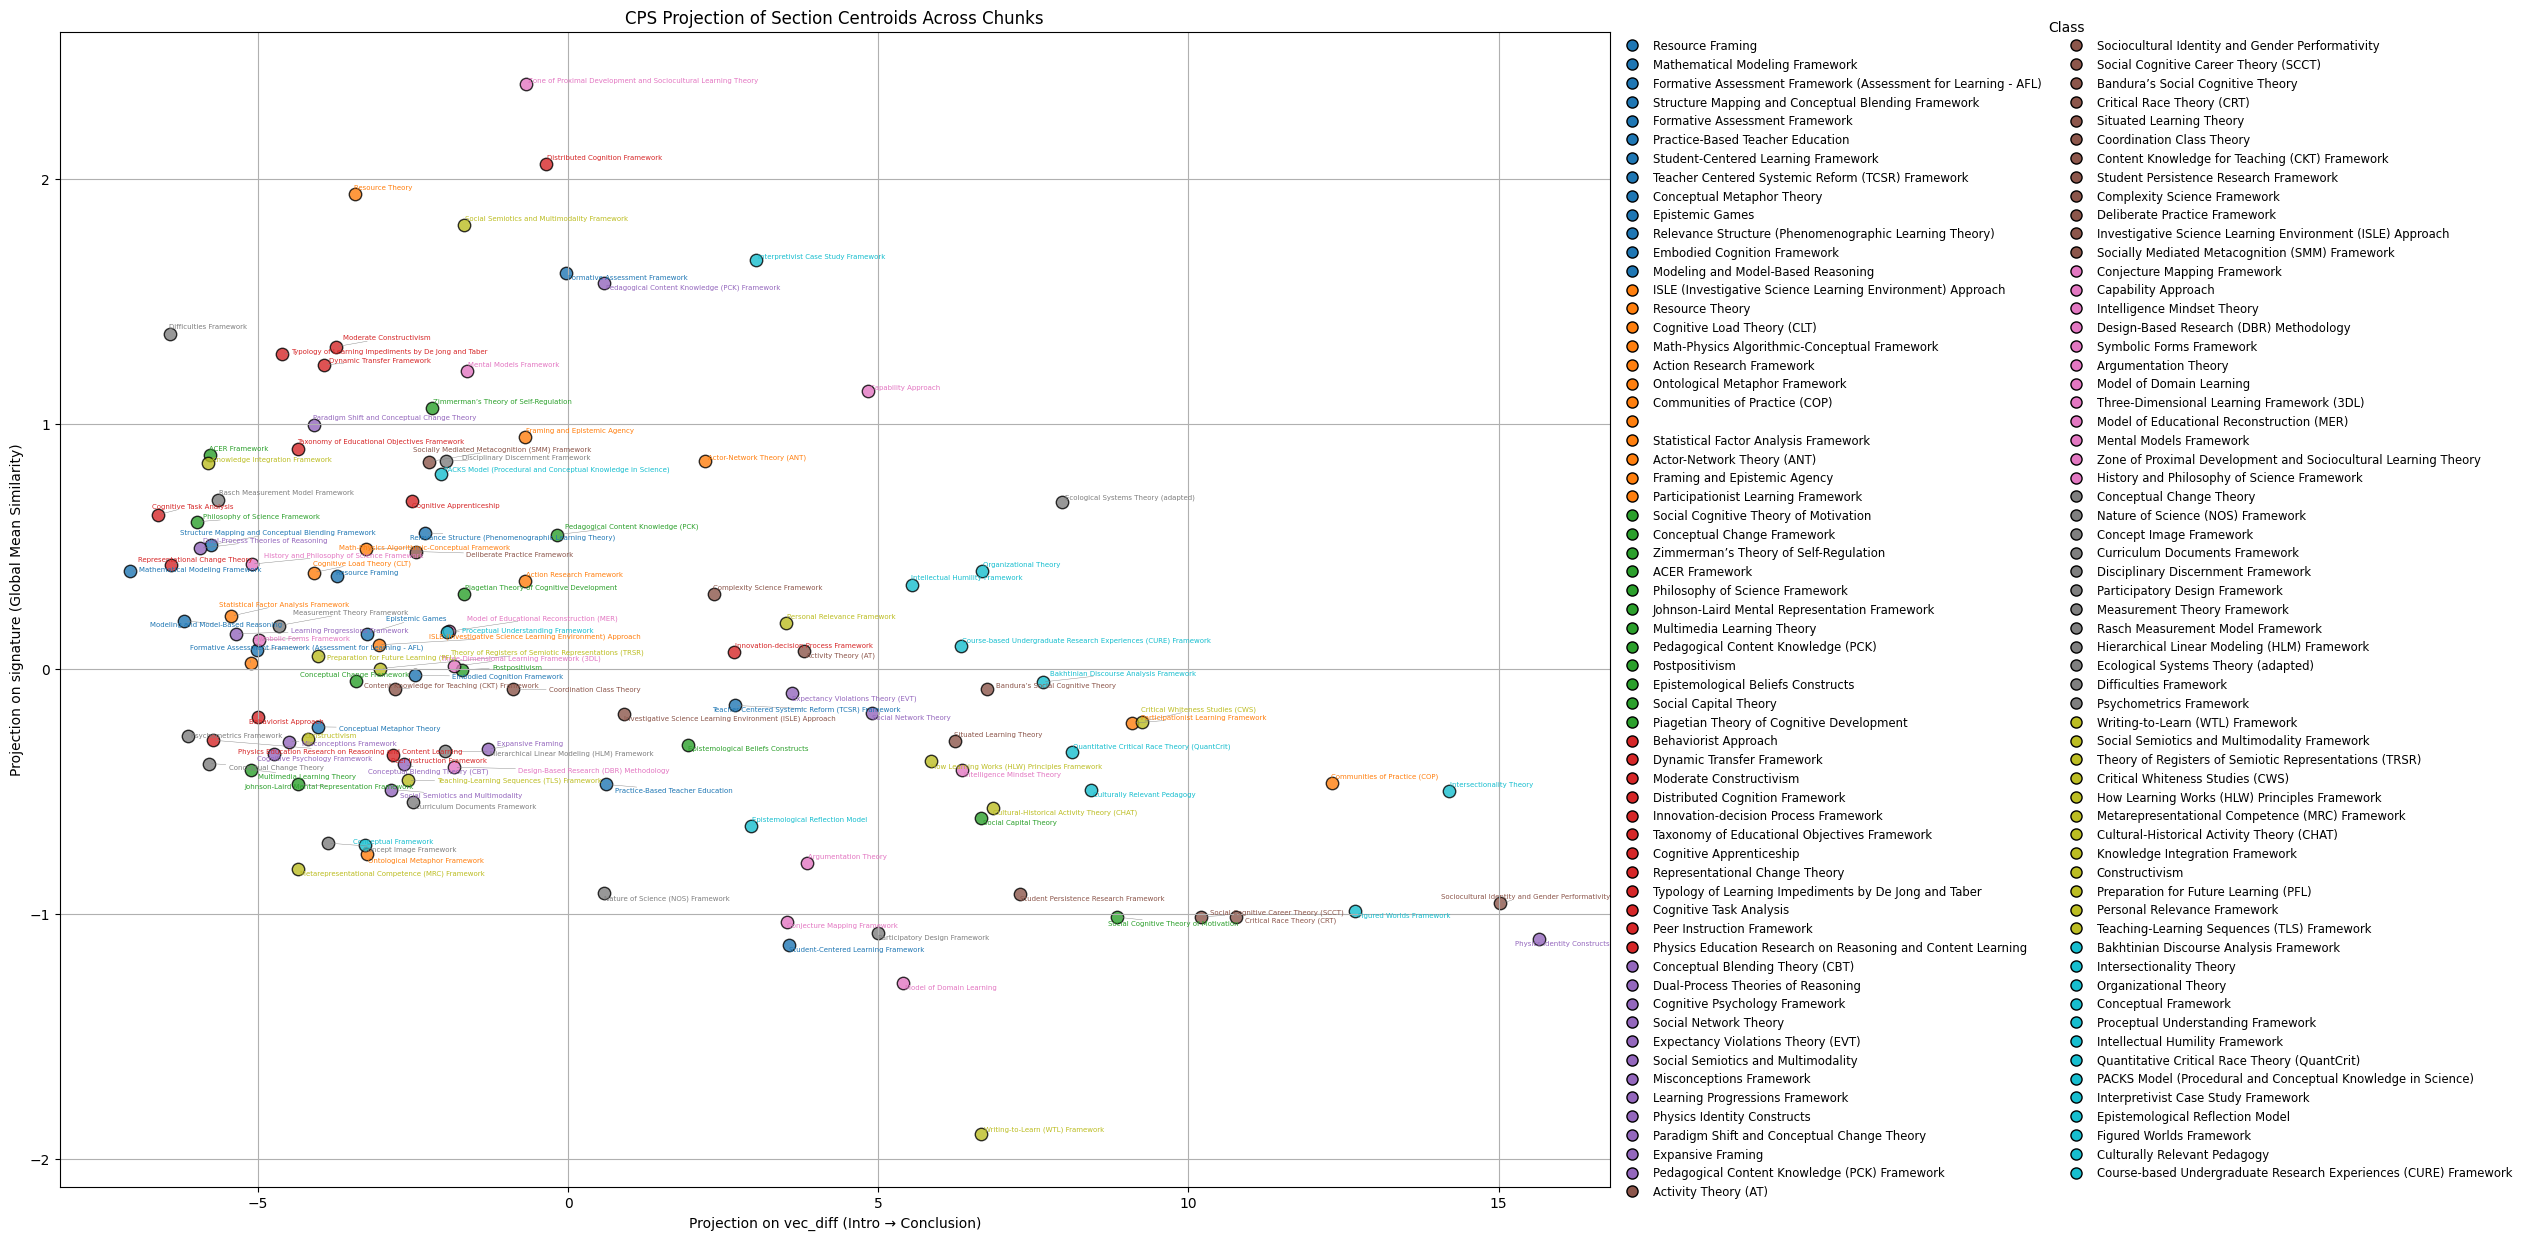

In [ ]:
points = collect_centroids(
    X_theory, y_numeric_theory,
    vec_diff= diff_vec_socio_cognitive,
    chunk_size= 500,
    label_names= label_names_theory
)
plot_collected_centroids_text_label(points, list(label_names_theory))

Plotting theoretical frameworks to evaluate evolution over time.

In [ ]:
label_mask = np.isin(y_numeric_theory, [12])
theory_class['theory_highest_prob_gpt-4.1-mini'][label_mask]
X_subtheory = X_theory[label_mask]
y_year = theory_class['article_year'][label_mask].to_numpy()

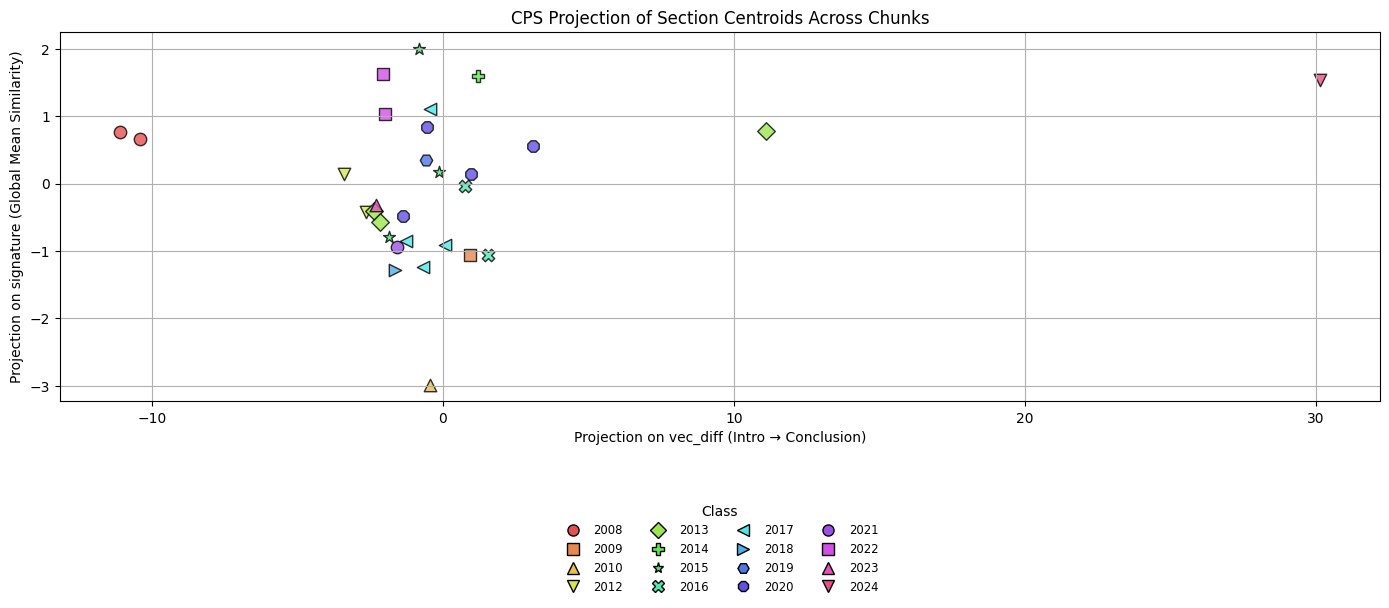

In [ ]:
# Single theory-type wrt. year

# Factorize the publication years
y_year_numeric, year_labels = pd.factorize(y_year)

# Map numeric year labels to actual years (e.g., 0 → 2008, 1 → 2012, ...)
year_to_numeric = {year: idx for idx, year in enumerate(year_labels)}
numeric_to_year = {idx: year for year, idx in year_to_numeric.items()}

# Identify the numeric label for the earliest and latest years
intro_year = min(year_to_numeric.keys())
conclusion_year = max(year_to_numeric.keys())

intro_label = year_to_numeric[intro_year]
conclusion_label = year_to_numeric[conclusion_year]

# Now collect centroids with correct intro/conclusion mapping
points = collect_centroids_intro_to_conclusion(
    X_subtheory[:], y_year_numeric[:],
    chunk_size=1,
    intro_label=intro_label,
    conclusion_label=conclusion_label
)

# Plot the result, with year_labels passed for the legend
plot_collected_centroids(points, label_names=year_labels)

# Now collect centroids with correct intro/conclusion mapping
points = collect_centroids_lda_seperation(
    X_subtheory[:], y_year_numeric[:],
    chunk_size=1,
    n_per_class=10
)

# Plot the result, with year_labels passed for the legend
#plot_collected_centroids(points, label_names=year_labels)



Importing theoretical frameworks with citation metrics

In [29]:
theory_cite = pd.read_csv('theory_classifications_w_citations')
theory_cite

,Unnamed: 0,article_abstract,article_articleType,article_authors,article_affiliations,article_date,article_type,article_metadata_last_modified_at,article_last_modified_at,article_id,...,classification_gpt-4.1-mini,classification_highest_prob_gpt-4.1-mini,failed_validation_gpt-4.1-mini,theory_classifications_gpt-4.1-mini,theory_probabilities_gpt-4.1-mini,theory_highest_prob_gpt-4.1-mini,citationCount,year,citationsPerYear,source
0,0,{'value': '<p>Decades of education research ha...,article,"[{'type': 'Person', 'name': 'Lei Bao', 'firstn...","[{'name': 'Department of Physics, The Ohio Sta...",2006-02-02,article,2006-03-02T15:44:54+0000,2014-08-22 11:32:06+00:00,10.1103/PhysRevSTPER.2.010103,...,['Theoretical Framework'],Theoretical Framework,False,"[""Resource Framing"", ""Representational Change ...","{""Resource Framing"": 0.55, ""Representational C...",Resource Framing,138,2006.0,6.90,semantic
1,1,{'value': '<p>Decades of education research ha...,article,"[{'type': 'Person', 'name': 'Lei Bao', 'firstn...","[{'name': 'Department of Physics, The Ohio Sta...",2006-02-02,article,2006-03-02T15:44:54+0000,2014-08-22 11:32:06+00:00,10.1103/PhysRevSTPER.2.010103,...,"['Theoretical Framework', 'Methods']",Theoretical Framework,False,"[""Mathematical Modeling Framework""]","{""Mathematical Modeling Framework"": 1.0}",Mathematical Modeling Framework,138,2006.0,6.90,semantic
2,2,{'value': '<p>The Brief Electricity and Magnet...,article,"[{'type': 'Person', 'name': 'Lin Ding', 'first...","[{'name': 'Department of Physics, North Caroli...",2006-03-15,article,2006-03-15T15:52:03+0000,2014-08-22 04:01:44+00:00,10.1103/PhysRevSTPER.2.010105,...,"['Theoretical Framework', 'Methods']",Theoretical Framework,False,"[""Formative Assessment Framework (Assessment f...","{""Formative Assessment Framework (Assessment f...",Formative Assessment Framework (Assessment for...,390,2006.0,19.50,semantic
3,3,{'value': '<p>Previous studies have demonstrat...,article,"[{'type': 'Person', 'name': 'Noah S. Podolefsk...","[{'name': 'Department of Physics, University o...",2006-07-18,article,2006-07-18T17:56:03+0000,2014-08-22 04:01:46+00:00,10.1103/PhysRevSTPER.2.020101,...,['Theoretical Framework'],Theoretical Framework,False,"[""Structure Mapping and Conceptual Blending Fr...","{""Structure Mapping and Conceptual Blending Fr...",Structure Mapping and Conceptual Blending Fram...,108,2006.0,5.40,semantic
4,4,{'value': '<p>The paper introduces a set of fo...,article,"[{'type': 'Person', 'name': 'Eugenia Etkina', ...",[{'name': 'Department of Physics and Astronomy...,2006-08-01,article,2006-08-01T19:34:02+0000,2014-08-22 04:19:22+00:00,10.1103/PhysRevSTPER.2.020103,...,['Theoretical Framework'],Theoretical Framework,False,"[""Formative Assessment Framework"", ""Cognitive ...","{""Formative Assessment Framework"": 0.75, ""Cogn...",Formative Assessment Framework,217,2006.0,10.85,semantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,584,{'value': '<p>The COVID-19 pandemic has increa...,article,"[{'type': 'Person', 'name': 'Walter Sciarretta...","[{'name': '<a href=""https://ror.org/05290cv24""...",2024-11-22,article,2024-11-22T15:05:29+0000,2024-11-22 15:05:29+00:00,10.1103/PhysRevPhysEducRes.20.020145,...,"['Theoretical Framework', 'Literature Review/R...",Theoretical Framework,False,"[""Philosophy of Science Framework"", ""Nature of...","{""Philosophy of Science Framework"": 0.5, ""Natu...",Philosophy of Science Framework,0,2024.0,0.00,semantic
585,585,"{'value': '<p>In this paper, we demonstrate th...",article,"[{'type': 'Person', 'name': 'Ofek Sivan', 'fir...","[{'name': 'Department of Science Teaching, <a ...",2024-11-25,article,2024-11-25T15:05:41+0000,2024-11-25 15:05:41+00:00,10.1103/PhysRevPhysEducRes.20.020146,...,['Theoretical Framework'],Theoretical Framework,False,"[""Commognitive Theory""]","{""Commognitive Theory"": 1.0}",Commognitive Theory,0,2024.0,0.00,semantic
586,586,"{'value': '<p>In this paper, we de

Plotting citation distribution to get an understanding of the data

(array([198., 102.,  83.,  42.,  39.,  21.,  19.,  19.,   8.,  13.,   7.,
          9.,   2.,   4.,   1.,   0.,   2.,   3.,   1.,   1.,   1.,   0.,
          1.,   1.,   0.,   2.,   0.,   1.,   5.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,   7.8,  15.6,  23.4,  31.2,  39. ,  46.8,  54.6,  62.4,
         70.2,  78. ,  85.8,  93.6, 101.4, 109.2, 117. , 124.8, 132.6,
        140.4, 148.2, 156. , 163.8, 171.6, 179.4, 187.2, 195. , 202.8,
        210.6, 218.4, 226.2, 234. , 241.8, 249.6, 257.4, 265.2, 273. ,
        280.8, 288.6, 296.4, 304.2, 312. , 319.8, 327.6, 335.4, 343.2,
        351. , 358.8, 366.6, 374.4, 382.2, 390. ]),
 <BarContainer object of 50 artists>)

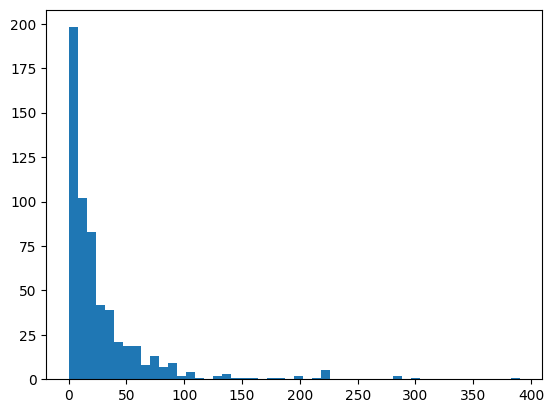

In [30]:
plt.hist(theory_cite.citationCount, bins = 50)

(array([52., 69., 54., 65., 62., 32., 47., 22., 27., 27., 21.,  8.,  8.,
        14.,  5.,  7.,  0.,  1.,  5.,  2.,  1.,  3.,  2.,  3.,  3.,  1.,
         0.,  2.,  0.,  6.,  2.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([ 0.        ,  0.43428571,  0.86857143,  1.30285714,  1.73714286,
         2.17142857,  2.60571429,  3.04      ,  3.47428571,  3.90857143,
         4.34285714,  4.77714286,  5.21142857,  5.64571429,  6.08      ,
         6.51428571,  6.94857143,  7.38285714,  7.81714286,  8.25142857,
         8.68571429,  9.12      ,  9.55428571,  9.98857143, 10.42285714,
        10.85714286, 11.29142857, 11.72571429, 12.16      , 12.59428571,
        13.02857143, 13.46285714, 13.89714286, 14.33142857, 14.76571429,
        15.2       , 15.63428571, 16.06857143, 16.50285714, 16.93714286,
        17.37142857, 17.80571429, 18.24      , 18.67428571, 19.10857143,
        19.54285714, 19.97714286, 20.41142857, 20.84571429,

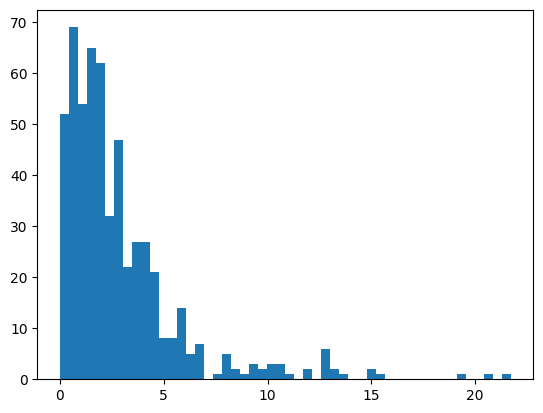

In [31]:
plt.hist(theory_cite.citationsPerYear, bins = 50)

Divide into eight quantiles depending on avg. citation/yr

In [32]:
# qcut will compute the 0%,25%,50%,75%,100% quantiles
# and assign each row to one of the 4 bins so that each has ~equal count

theory_cite['citation_idx'] = pd.qcut(theory_cite['citationsPerYear'], q=8)

theory_cite

,Unnamed: 0,article_abstract,article_articleType,article_authors,article_affiliations,article_date,article_type,article_metadata_last_modified_at,article_last_modified_at,article_id,...,classification_highest_prob_gpt-4.1-mini,failed_validation_gpt-4.1-mini,theory_classifications_gpt-4.1-mini,theory_probabilities_gpt-4.1-mini,theory_highest_prob_gpt-4.1-mini,citationCount,year,citationsPerYear,source,citation_idx
0,0,{'value': '<p>Decades of education research ha...,article,"[{'type': 'Person', 'name': 'Lei Bao', 'firstn...","[{'name': 'Department of Physics, The Ohio Sta...",2006-02-02,article,2006-03-02T15:44:54+0000,2014-08-22 11:32:06+00:00,10.1103/PhysRevSTPER.2.010103,...,Theoretical Framework,False,"[""Resource Framing"", ""Representational Change ...","{""Resource Framing"": 0.55, ""Representational C...",Resource Framing,138,2006.0,6.90,semantic,"(5.329, 21.714]"
1,1,{'value': '<p>Decades of education research ha...,article,"[{'type': 'Person', 'name': 'Lei Bao', 'firstn...","[{'name': 'Department of Physics, The Ohio Sta...",2006-02-02,article,2006-03-02T15:44:54+0000,2014-08-22 11:32:06+00:00,10.1103/PhysRevSTPER.2.010103,...,Theoretical Framework,False,"[""Mathematical Modeling Framework""]","{""Mathematical Modeling Framework"": 1.0}",Mathematical Modeling Framework,138,2006.0,6.90,semantic,"(5.329, 21.714]"
2,2,{'value': '<p>The Brief Electricity and Magnet...,article,"[{'type': 'Person', 'name': 'Lin Ding', 'first...","[{'name': 'Department of Physics, North Caroli...",2006-03-15,article,2006-03-15T15:52:03+0000,2014-08-22 04:01:44+00:00,10.1103/PhysRevSTPER.2.010105,...,Theoretical Framework,False,"[""Formative Assessment Framework (Assessment f...","{""Formative Assessment Framework (Assessment f...",Formative Assessment Framework (Assessment for...,390,2006.0,19.50,semantic,"(5.329, 21.714]"
3,3,{'value': '<p>Previous studies have demonstrat...,article,"[{'type': 'Person', 'name': 'Noah S. Podolefsk...","[{'name': 'Department of Physics, University o...",2006-07-18,article,2006-07-18T17:56:03+0000,2014-08-22 04:01:46+00:00,10.1103/PhysRevSTPER.2.020101,...,Theoretical Framework,False,"[""Structure Mapping and Conceptual Blending Fr...","{""Structure Mapping and Conceptual Blending Fr...",Structure Mapping and Conceptual Blending Fram...,108,2006.0,5.40,semantic,"(5.329, 21.714]"
4,4,{'value': '<p>The paper introduces a set of fo...,article,"[{'type': 'Person', 'name': 'Eugenia Etkina', ...",[{'name': 'Department of Physics and Astronomy...,2006-08-01,article,2006-08-01T19:34:02+0000,2014-08-22 04:19:22+00:00,10.1103/PhysRevSTPER.2.020103,...,Theoretical Framework,False,"[""Formative Assessment Framework"", ""Cognitive ...","{""Formative Assessment Framework"": 0.75, ""Cogn...",Formative Assessment Framework,217,2006.0,10.85,semantic,"(5.329, 21.714]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,584,{'value': '<p>The COVID-19 pandemic has increa...,article,"[{'type': 'Person', 'name': 'Walter Sciarretta...","[{'name': '<a href=""https://ror.org/05290cv24""...",2024-11-22,article,2024-11-22T15:05:29+0000,2024-11-22 15:05:29+00:00,10.1103/PhysRevPhysEducRes.20.020145,...,Theoretical Framework,False,"[""Philosophy of Science Framework"", ""Nature of...","{""Philosophy of Science Framework"": 0.5, ""Natu...",Philosophy of Science Framework,0,2024.0,0.00,semantic,"(-0.001, 0.563]"
585,585,"{'value': '<p>In this paper, we demonstrate th...",article,"[{'type': 'Person', 'name': 'Ofek Sivan', 'fir...","[{'name': 'Department of Science Teaching, <a ...",2024-11-25,article,2024-11-25T15:05:41+0000,2024-11-25 15:05:41+00:00,10.1103/PhysRevPhysEducRes.20.020146,...,Theoretical Framework,False,"[""Commognitive Theory""]","{""Commognitive Theory"": 1.0}",Commognitive Theory,0,2024.0,0.00,semantic,"(-0.001, 0.563]"
586,586,"{'value': '<p>In this paper, we demonstrate th...",article,"[{'type': 'Person', 'name': 'Ofek Sivan', 'fir...","[{'name': 'Department of Science Teaching, <a

Assortment of projections onto citation difference vectors

In [33]:
X_theory = np.array(theory_class['section_content_embedding'].tolist())
y_theory_cite = theory_cite['citation_idx']
y_numeric_cite, label_names_cite = pd.factorize(y_theory_cite)

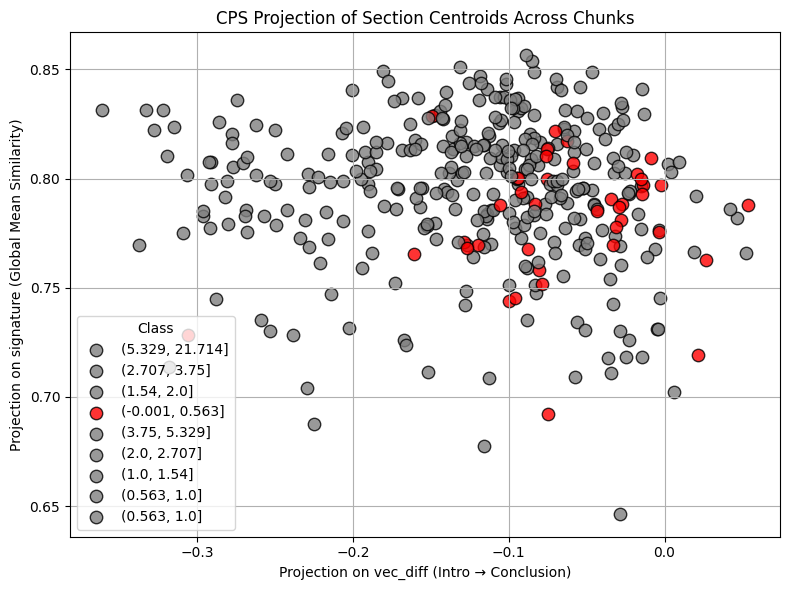

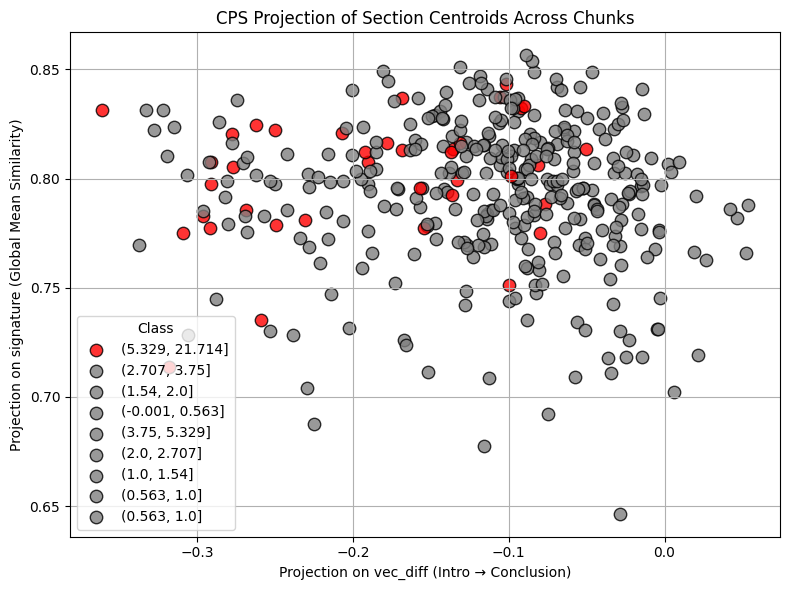

In [34]:
X_theory = np.array(theory_class['section_content_embedding'].tolist())
y_theory = theory_cite['citation_idx']
y_numeric, label_names = pd.factorize(y_theory)

points = collect_centroids_intro_to_conclusion_no_scaling_highlighted(
    X_theory[:], y_numeric_cite[:],
    chunk_size=5,
    intro_label=0,
    label_names=label_names,
    conclusion_label=3,
    highlight_label= 3
)
plot_collected_centroids_highlighted(points, list(label_names))

points = collect_centroids_intro_to_conclusion_no_scaling_highlighted(
    X_theory[:], y_numeric[:],
    chunk_size=5,
    intro_label=0,
    label_names= label_names,
    conclusion_label=3,
    highlight_label= 0
)
plot_collected_centroids_highlighted(points, list(label_names))

C:\Users\larsg\AppData\Local\Temp\ipykernel_9244\1169831386.py:251: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')


TypeError: tight_layout() takes 0 positional arguments but 1 was given

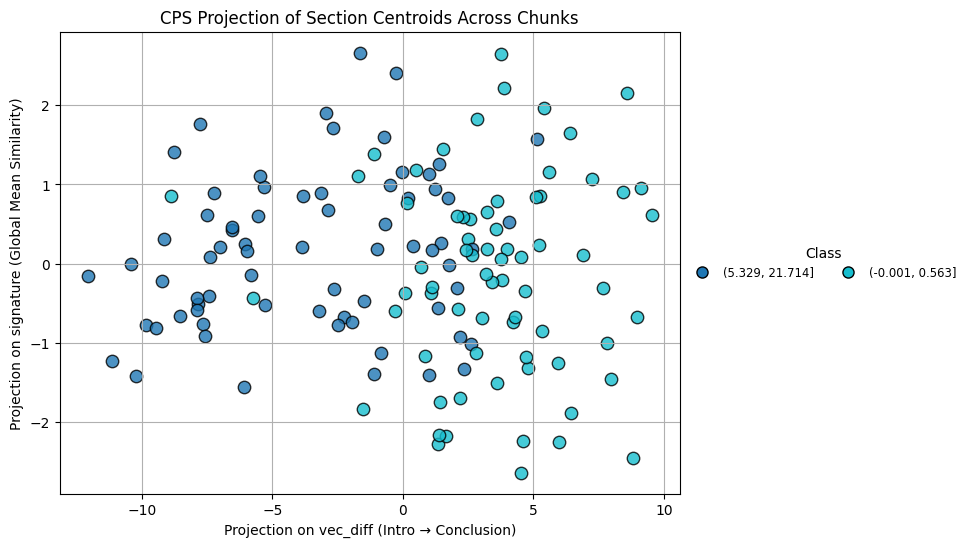

In [35]:
mask = np.isin(y_numeric_cite, [0,3])
points = collect_centroids_intro_to_conclusion(
    X_theory[mask], y_numeric[mask],
    chunk_size=1,
    intro_label=0,
    label_names=label_names,
    conclusion_label=3
)
plot_collected_centroids(points, list(label_names_cite))

Plotting theoretical frameworks against critical/cognitive difference vector with theoretical classification label

C:\Users\larsg\AppData\Local\Temp\ipykernel_9244\1219374835.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')


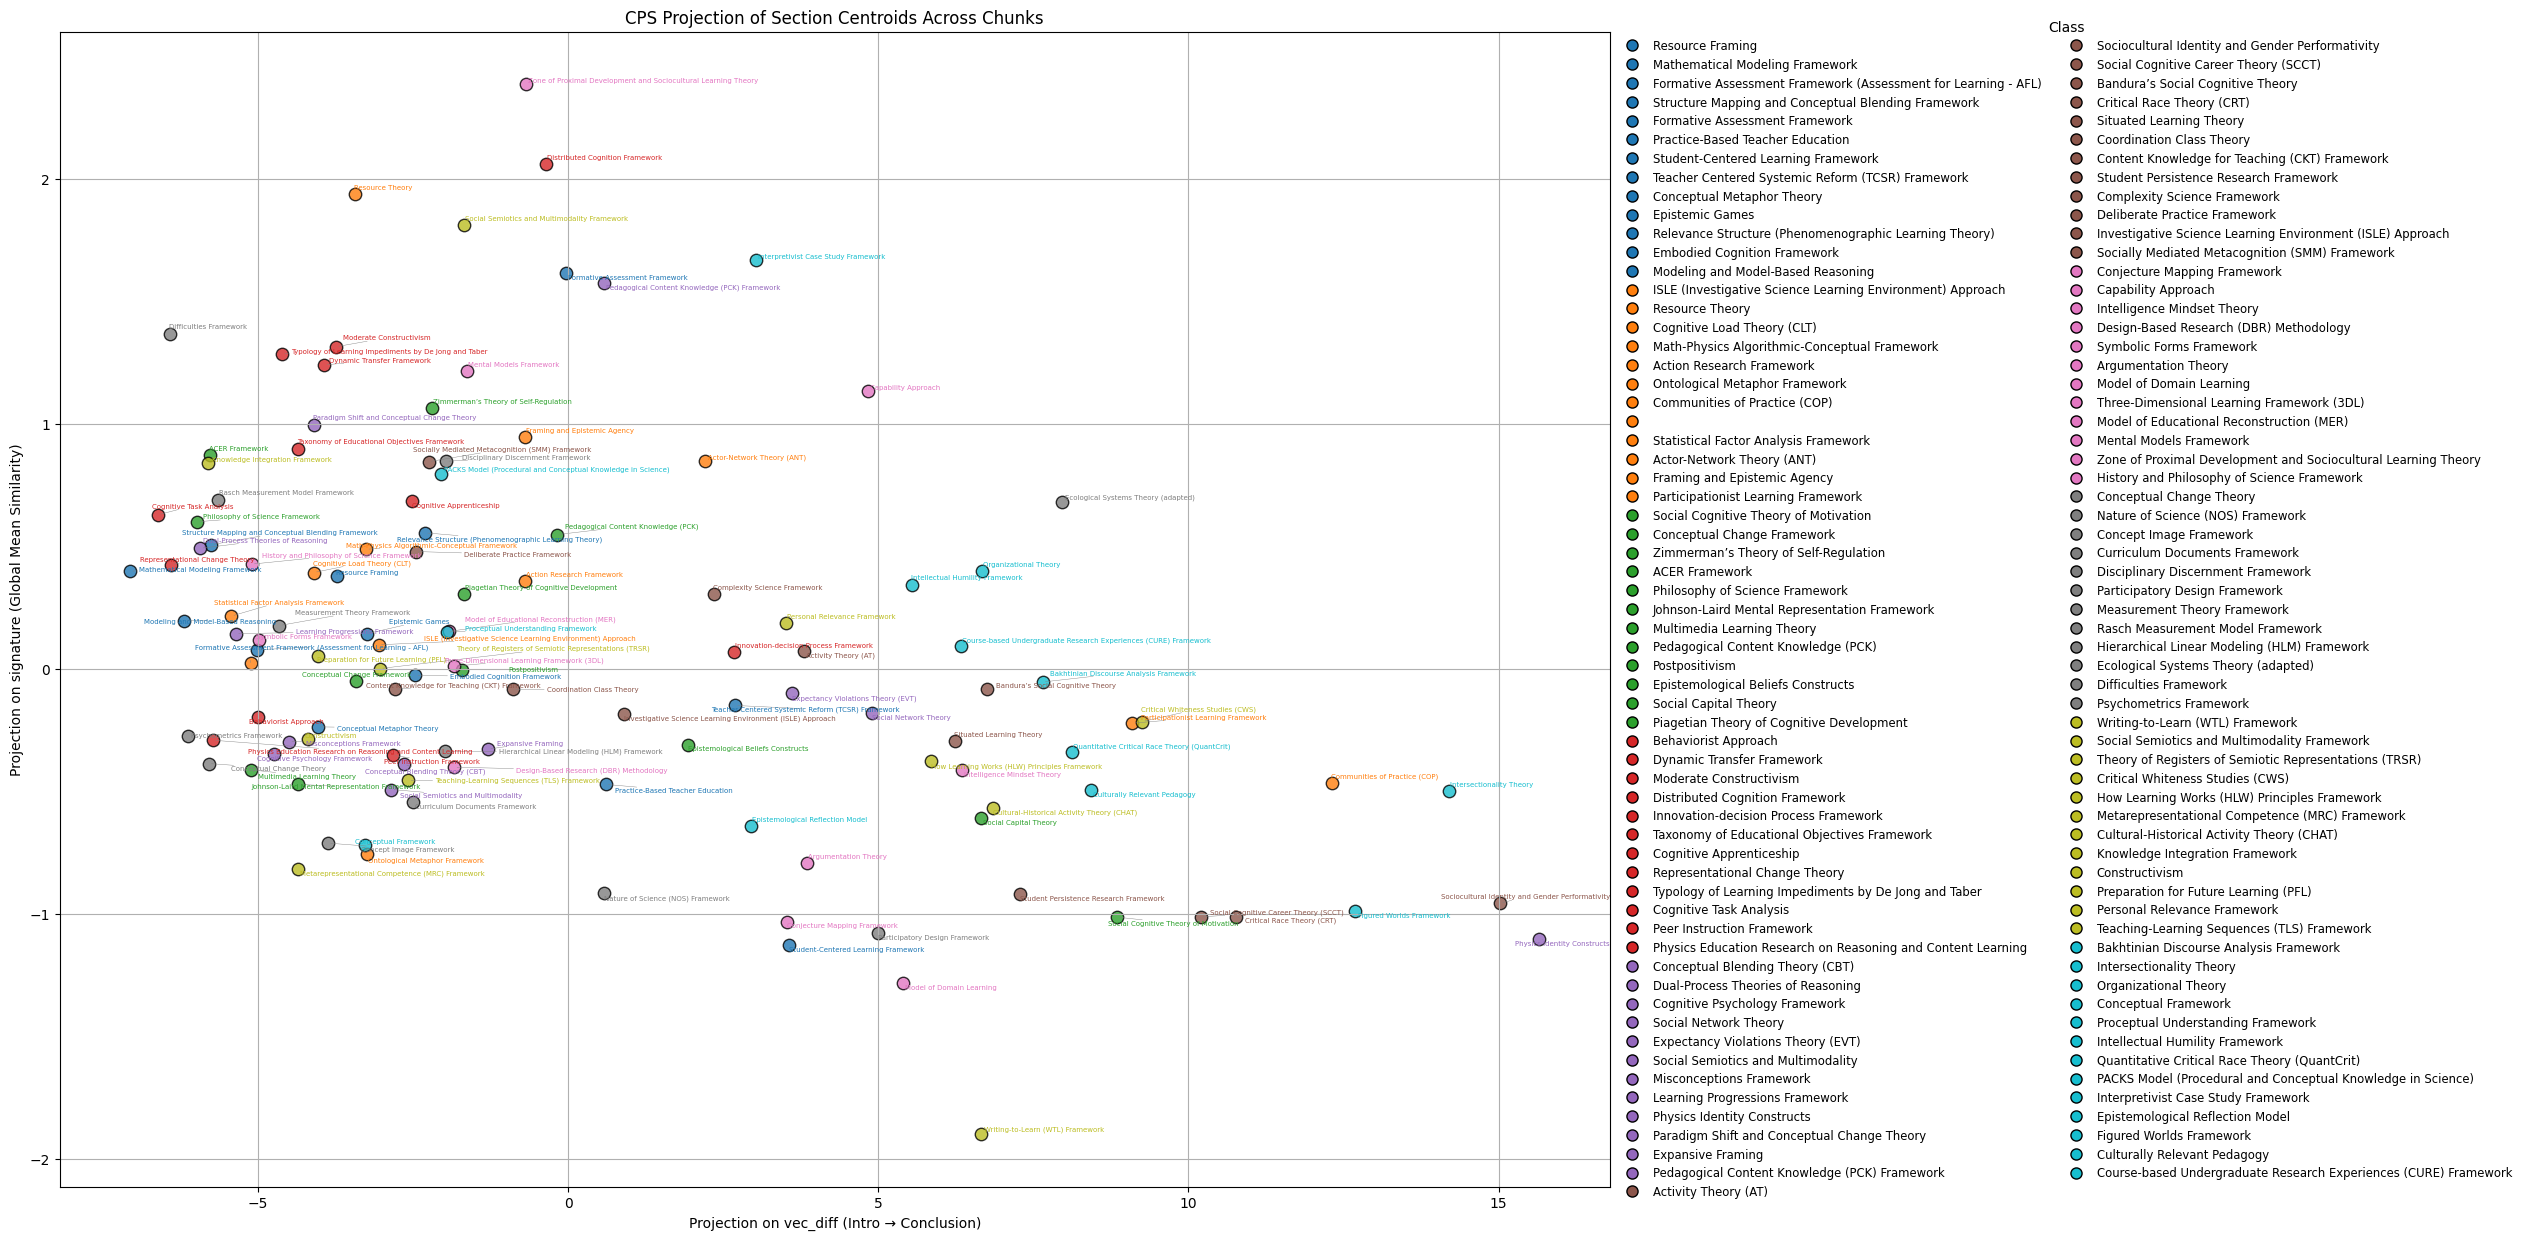

In [36]:
vec_diff_cite = X_theory[y_numeric_cite == 0].mean(0)-X_theory[y_numeric_cite == 3].mean(0)
vec_diff_cite /= np.linalg.norm(vec_diff_cite)

points = collect_centroids(
    X_theory, y_numeric_theory,
    vec_diff= diff_vec_socio_cognitive,
    chunk_size=500
)
plot_collected_centroids_text_label(points, list(label_names_theory))

Plotting theoretical frameworks against critical/cogntive difference vectors with citation quantile labels.

C:\Users\larsg\AppData\Local\Temp\ipykernel_5344\1219374835.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')


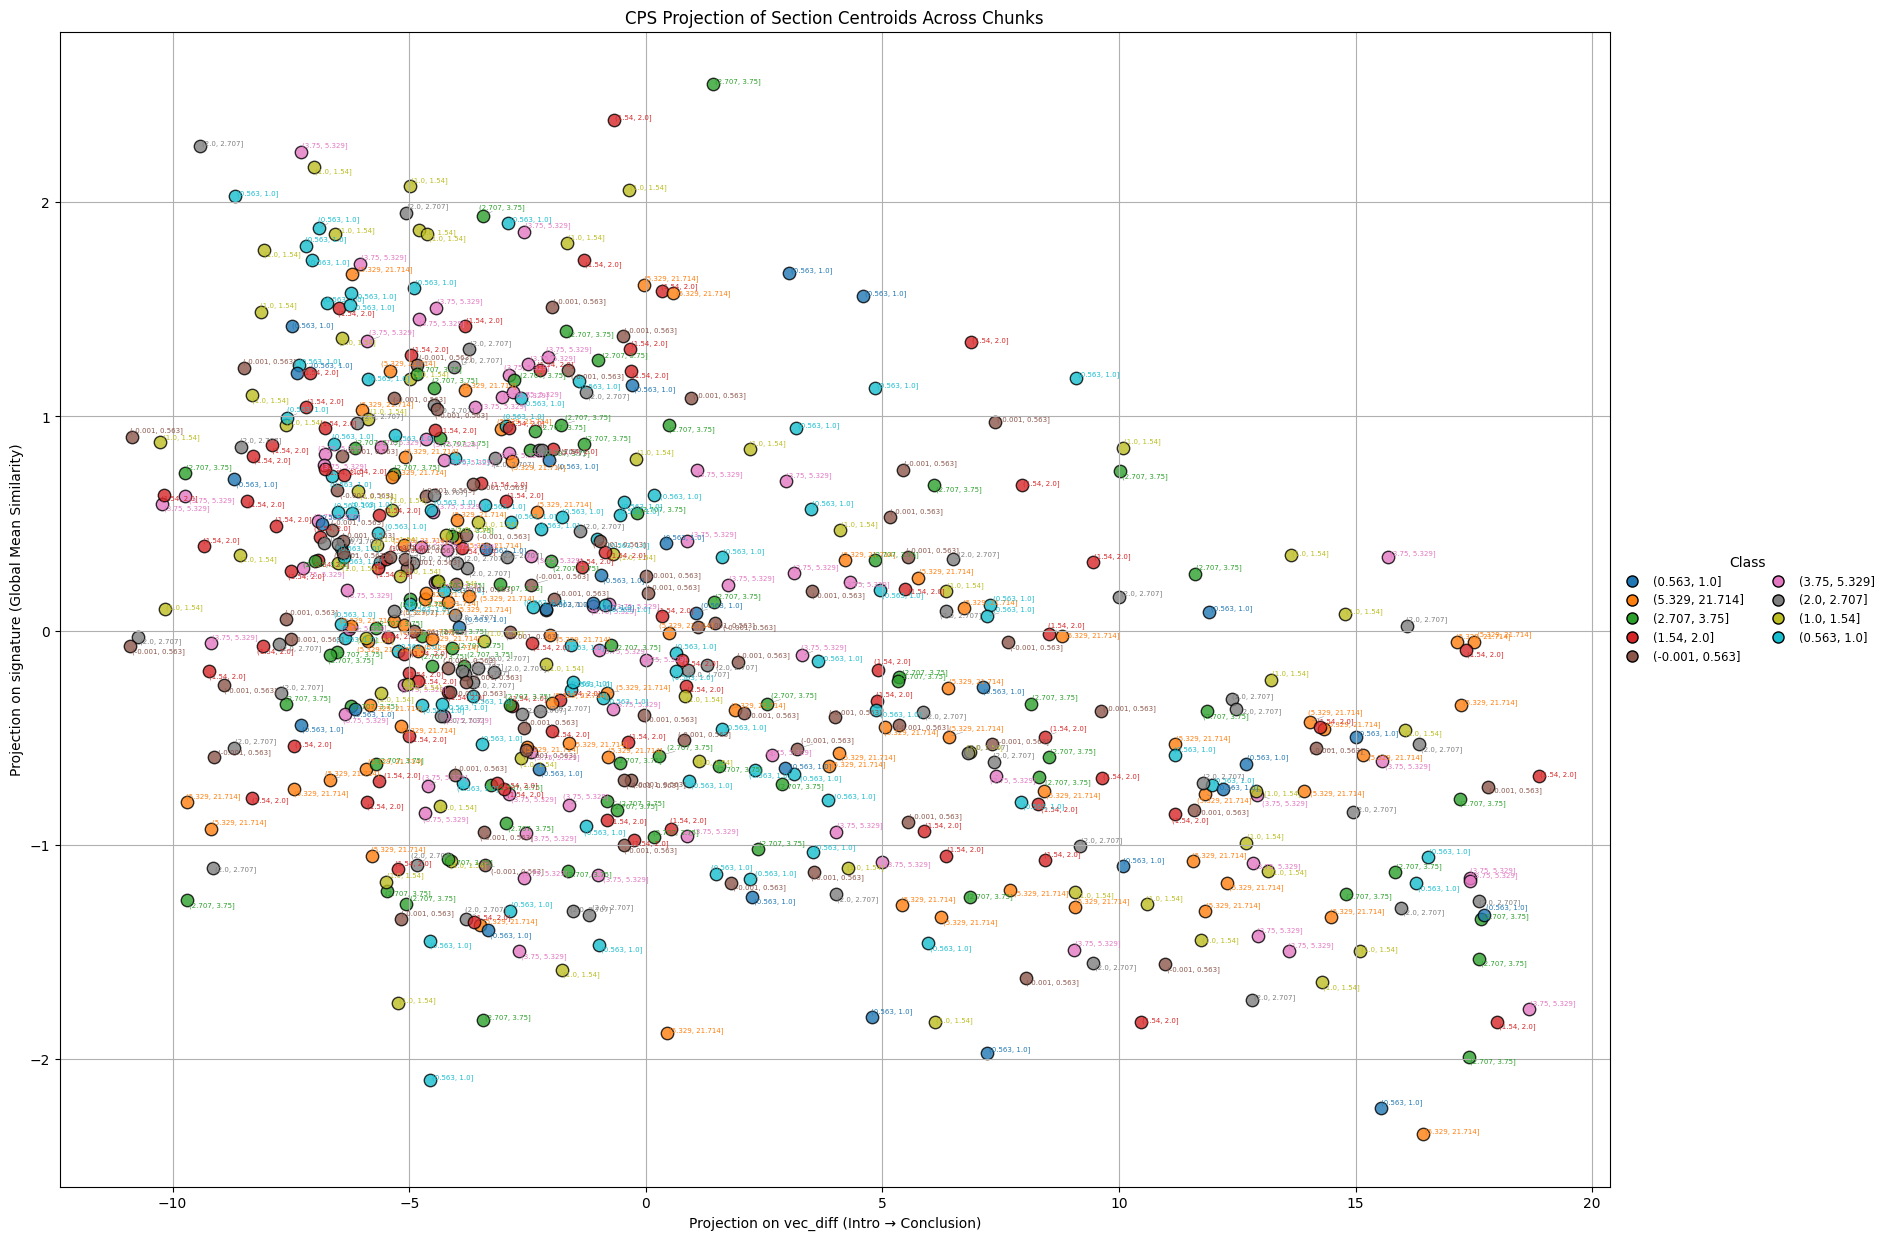

In [ ]:
points = collect_centroids(
    X_theory, y_numeric_cite,
    vec_diff= diff_vec_socio_cognitive,
    chunk_size=1
)
plot_collected_centroids_text_label(points, list(label_names_cite))